# Project:  Patterns in San Francisco Crimes during 2014

For now we will just do some preliminary visualizations to understand how jupyter notebook rendering works on github

##Test Rendering

In [7]:
# imports
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('sanfrancisco_incidents_summer_2014.csv')




In [16]:
data

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244
4,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,08/31/2014,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,37.772313,"(37.7723131976814, -122.509895418239)",14073422072000
5,140734349,DRUG/NARCOTIC,POSSESSION OF MARIJUANA,Sunday,08/31/2014,23:13,SOUTHERN,"ARREST, BOOKED",11TH ST / MINNA ST,-122.416578,37.773907,"(37.773907074489, -122.416578493475)",14073434916010
6,140734349,DRUG/NARCOTIC,POSSESSION OF CONTROLLED SUBSTANCE FOR SALE,Sunday,08/31/2014,23:13,SOUTHERN,"ARREST, BOOKED",11TH ST / MINNA ST,-122.416578,37.773907,"(37.773907074489, -122.416578493475)",14073434916662
7,140734349,DRIVING UNDER THE INFLUENCE,DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL,Sunday,08/31/2014,23:13,SOUTHERN,"ARREST, BOOKED",11TH ST / MINNA ST,-122.416578,37.773907,"(37.773907074489, -122.416578493475)",14073434965050
8,140738147,OTHER OFFENSES,EVADING A POLICE OFFICER RECKLESSLY,Sunday,08/31/2014,23:00,INGLESIDE,NONE,1400 Block of DOLORES ST,-122.424498,37.746649,"(37.7466488718366, -122.424497944857)",14073814727175
9,140734258,TRESPASS,TRESPASSING,Sunday,08/31/2014,23:00,CENTRAL,"ARREST, CITED",900 Block of MASON ST,-122.410846,37.792316,"(37.7923158747647, -122.410845624227)",14073425827195


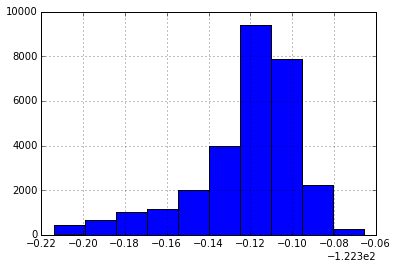

In [17]:
data['X'].hist()

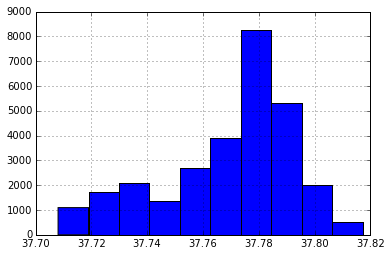

In [18]:
data['Y'].hist()

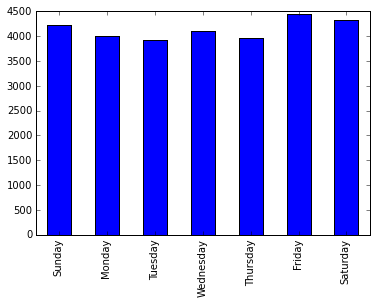

In [25]:
data['DayOfWeek'].value_counts().reindex(['Sunday', 'Monday', "Tuesday", 'Wednesday', 'Thursday', 'Friday', 'Saturday']).plot(kind="bar")